# Energy metrics comparison

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import wilcoxon

sns.set_theme(style="whitegrid", font_scale=1.5)

In [ ]:
baseline = pd.read_csv('sd3_baseline/pareto_front.csv')
baseline['fitness'] = 'Baseline'

In [ ]:
cpu = pd.read_csv('s3_nsgaii_results_cpu/results.csv')
cpu['fitness'] = 'CPU'
gpu = pd.read_csv('s3_nsgaii_results_gpu/results.csv')
gpu['fitness'] = 'GPU'
duration = pd.read_csv('s3_nsgaii_results_duration/results.csv')
duration['fitness'] = 'Duration'

In [ ]:
energy_stats = pd.concat([baseline, cpu, gpu, duration]).drop(columns="Solution")

In [ ]:
energy_stats.dropna(inplace=True)

/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_47084/2990390864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_stats.dropna(inplace=True)


In [ ]:
energy_stats_melt = pd.melt(energy_stats, id_vars=['Round', 'fitness'], var_name='Metric', value_name='Value')

In [ ]:
for metric in energy_stats_melt['Metric'].unique():
    energy_stats_melt[energy_stats_melt['Metric'] == metric].groupby(['fitness'])

In [ ]:
groups = energy_stats_melt.groupby(['fitness', 'Metric'])['Value'].agg(['mean','std']).unstack().T.reset_index()

In [ ]:
groups

fitness,level_0,Metric,CPU,Duration,GPU,baseline
0,mean,CPU Energy,0.000117,0.000141,0.000099,0.000201
1,mean,Duration,19.582718,23.272446,16.445396,33.792827
2,mean,Ethnicity Fitness,0.844672,0.637500,0.836430,1.173333
3,mean,GPU Energy,0.000697,0.000837,0.000582,0.001946
4,mean,Gender Fitness,0.521569,0.575000,0.403030,1.000000
5,mean,Image Quality,0.706934,0.707947,0.639457,0.642035
6,std,CPU Energy,0.000054,0.000013,0.000098,0.000002
7,std,Duration,9.113121,2.159676,16.119100,0.083097
8,std,Ethnicity Fitness,0.182209,0.193209,0.243995,0.128475
9,std,GPU Energy,0.000325,0.000079,0.000573,0.000016


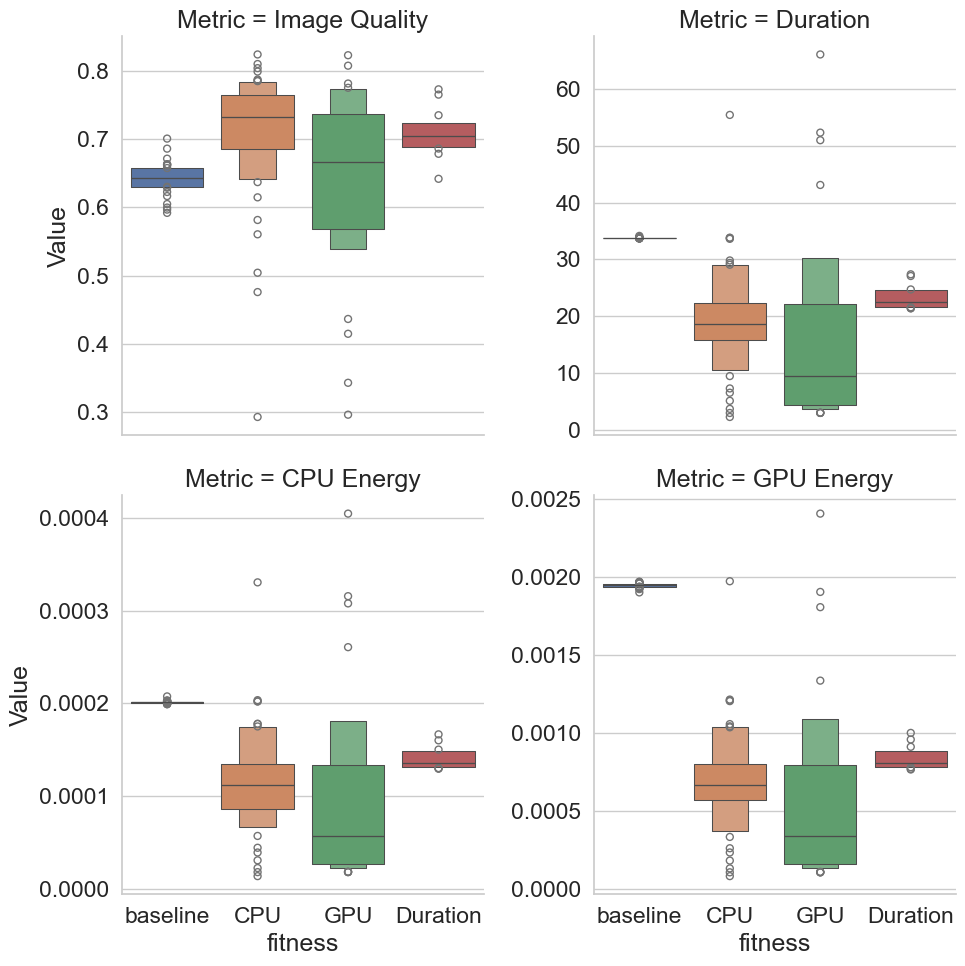

In [ ]:
sns.catplot(
  data=energy_stats_melt[energy_stats_melt['Metric'].isin(['Image Quality', 'CPU Energy', 'GPU Energy', 'Duration'])],
  x='fitness',
  y='Value',
  col='Metric',
  hue='fitness',
  kind='boxen',
  col_wrap=2,
  sharey=False
)

In [ ]:
groups_melt = groups.melt(id_vars=['Metric', 'level_0'], var_name='fitness', value_name='Value')
groups_melt = groups_melt.pivot(index=['level_0', 'fitness'], columns='Metric', values='Value')

In [ ]:
groups_melt = groups_melt.reset_index()

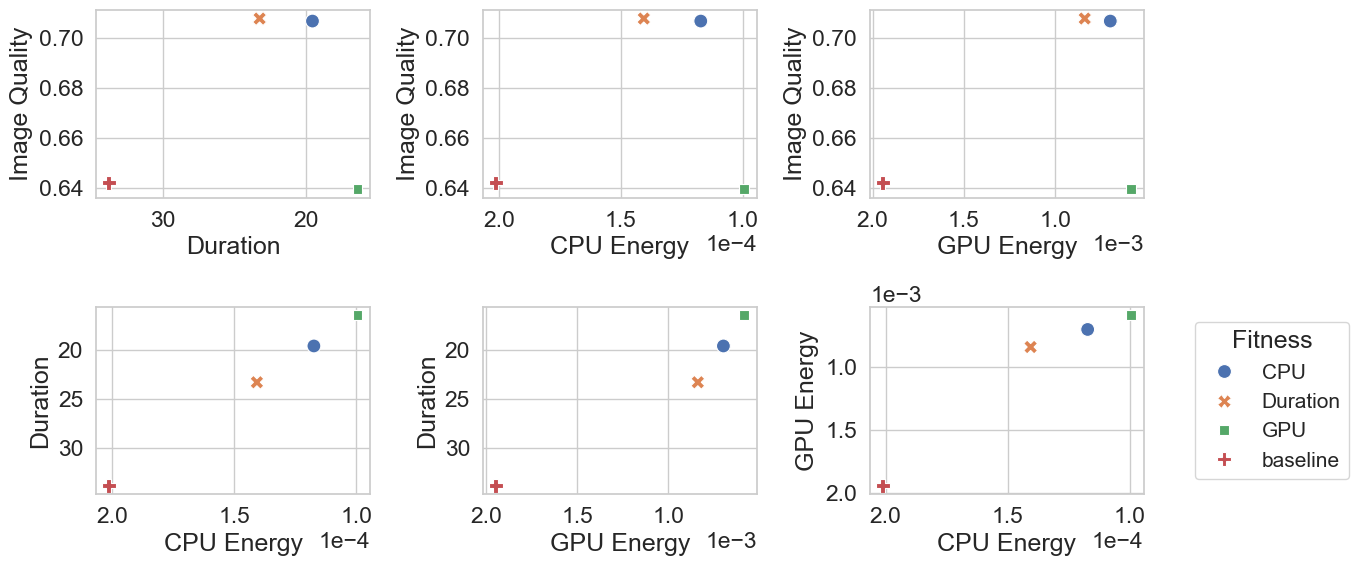

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(14, 6))
sns.scatterplot(
    data=groups_melt[groups_melt['level_0'] == 'mean'],
    x = 'Duration',
    y = 'Image Quality',
    hue = 'fitness',
    style= 'fitness',
    s = 100,
    ax=ax[0, 0],
    legend=False
)

sns.scatterplot(
    data=groups_melt[groups_melt['level_0'] == 'mean'],
    x = 'CPU Energy',
    y = 'Image Quality',
    hue = 'fitness',
    style= 'fitness',
    s = 100,
    ax=ax[0, 1],
    legend=False
)

sns.scatterplot(
    data=groups_melt[groups_melt['level_0'] == 'mean'],
    x = 'GPU Energy',
    y = 'Image Quality',
    hue = 'fitness',
    style= 'fitness',
    s = 100,
    ax=ax[0, 2],
    legend=False
)

sns.scatterplot(
    data=groups_melt[groups_melt['level_0'] == 'mean'],
    y = 'Duration',
    x = 'CPU Energy',
    hue = 'fitness',
    style= 'fitness',
    s = 100,
    ax=ax[1, 0],
    legend=False
)

sns.scatterplot(
    data=groups_melt[groups_melt['level_0'] == 'mean'],
    y = 'Duration',
    x = 'GPU Energy',
    hue = 'fitness',
    style= 'fitness',
    s = 100,
    ax=ax[1, 1],
    legend=False
)

sns.scatterplot(
    data=groups_melt[groups_melt['level_0'] == 'mean'],
    x = 'CPU Energy',
    y = 'GPU Energy',
    hue = 'fitness',
    style= 'fitness',
    s = 100,
    ax=ax[1, 2]
)

ax[1,2].legend(
    loc='center left',
    title='Fitness',
    fontsize='small',
    title_fontsize='medium',
    bbox_to_anchor=(1.15, 0.5),
)



# invert x-axis
ax[0, 0].set_xlim(ax[0, 0].get_xlim()[::-1])
ax[0, 1].set_xlim(ax[0, 1].get_xlim()[::-1])
ax[0, 2].set_xlim(ax[0, 2].get_xlim()[::-1])

ax[1, 0].set_xlim(ax[1, 0].get_xlim()[::-1])
ax[1, 0].set_ylim(ax[1, 0].get_ylim()[::-1])
ax[1, 1].set_xlim(ax[1, 1].get_xlim()[::-1])
ax[1, 1].set_ylim(ax[1, 1].get_ylim()[::-1])
ax[1, 2].set_xlim(ax[1, 2].get_xlim()[::-1])
ax[1, 2].set_ylim(ax[1, 2].get_ylim()[::-1])    

# set scientific notation for x-axis
ax[0, 1].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax[0, 2].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax[1, 0].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax[1, 1].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax[1, 2].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax[1, 2].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

plt.tight_layout()
plt.savefig('imgs/energy_tradeoff.pdf', bbox_inches='tight')

In [ ]:
energy_stats = energy_stats[['Image Quality', 'Duration', 'CPU Energy', 'GPU Energy', 'fitness']]

In [ ]:
# write a function that returns the pareto front from this dataframe
def pareto_front(df):
    df = df.sort_values(by=['Image Quality', 'Duration', 'CPU Energy', 'GPU Energy'], ascending=[False, True, True, True])
    pareto = []
    for i in range(len(df)):
        if not any((df.iloc[i]['Image Quality'] <= p['Image Quality'] and
                    df.iloc[i]['Duration'] >= p['Duration'] and
                    df.iloc[i]['CPU Energy'] >= p['CPU Energy'] and
                    df.iloc[i]['GPU Energy'] >= p['GPU Energy']) for p in pareto):
            pareto.append(df.iloc[i])
    return pd.DataFrame(pareto)

def pareto_front_two_distinct(df, metric1, metric2):
    df = df.sort_values(by=[metric1, metric2], ascending=[False, True])
    pareto = []
    for i in range(len(df)):
        if not any((df.iloc[i][metric1] <= p[metric1] and
                    df.iloc[i][metric2] >= p[metric2]) for p in pareto):
            pareto.append(df.iloc[i])
    return pd.DataFrame(pareto)

def pareto_front_two_equal(df, metric1, metric2):
    df = df.sort_values(by=[metric1, metric2], ascending=[True, True])
    pareto = []
    for i in range(len(df)):
        if not any((df.iloc[i][metric1] >= p[metric1] and
                    df.iloc[i][metric2] >= p[metric2]) for p in pareto):
            pareto.append(df.iloc[i])
    return pd.DataFrame(pareto)

pareto_full = pareto_front(energy_stats)

pareto_img_dur = pareto_front_two_distinct(energy_stats, 'Image Quality', 'Duration')
pareto_img_cpu = pareto_front_two_distinct(energy_stats, 'Image Quality', 'CPU Energy')
pareto_img_gpu = pareto_front_two_distinct(energy_stats, 'Image Quality', 'GPU Energy')
pareto_cpu_gpu = pareto_front_two_equal(energy_stats, 'CPU Energy', 'GPU Energy')
pareto_cpu_dur = pareto_front_two_equal(energy_stats, 'CPU Energy', 'Duration')
pareto_gpu_dur = pareto_front_two_equal(energy_stats, 'GPU Energy', 'Duration')

In [ ]:
pareto_full['fitness'].value_counts()

fitness
CPU    5
GPU    5
Name: count, dtype: int64

In [ ]:
full_pareto = pd.concat([
    pareto_img_dur.assign(Metric='Image Quality vs Duration'),
    pareto_img_cpu.assign(Metric='Image Quality vs CPU Energy'),
    pareto_img_gpu.assign(Metric='Image Quality vs GPU Energy'),
    pareto_cpu_gpu.assign(Metric='CPU Energy vs GPU Energy'),
    pareto_cpu_dur.assign(Metric='CPU Energy vs Duration'),
    pareto_gpu_dur.assign(Metric='GPU Energy vs Duration')
])

In [ ]:
full_pareto['fitness'].value_counts()

fitness
CPU    18
GPU    13
Name: count, dtype: int64

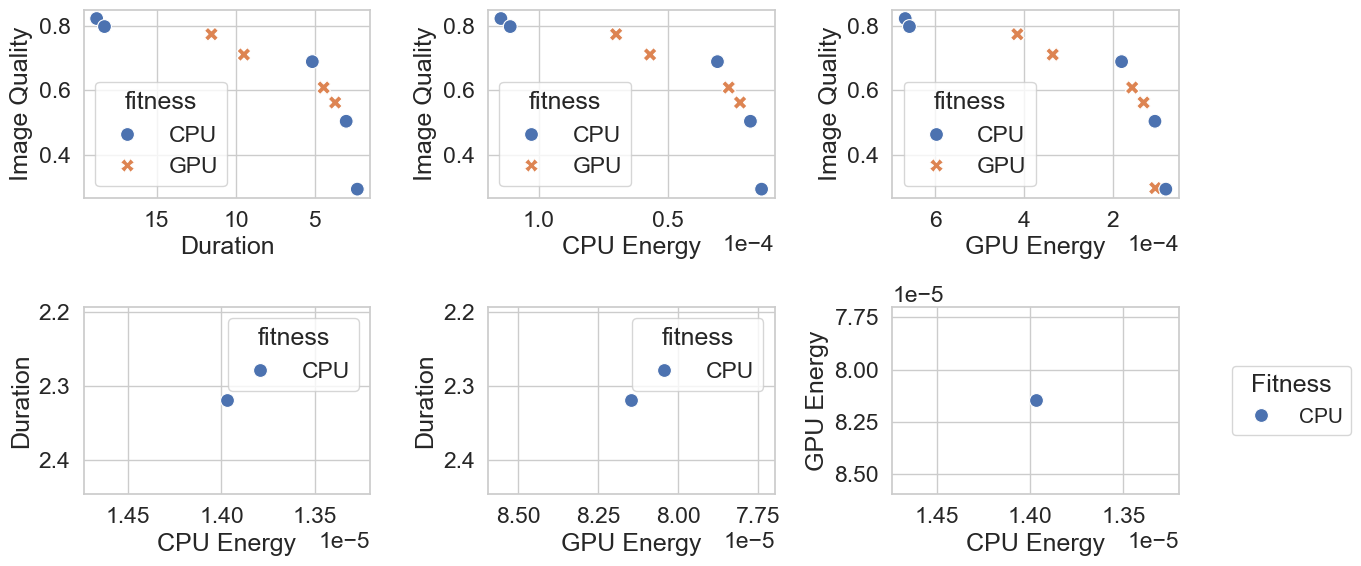

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(14, 6))
sns.scatterplot(
    data=pareto_img_dur,
    x = 'Duration',
    y = 'Image Quality',
    hue = 'fitness',
    style= 'fitness',
    s = 100,
    ax=ax[0, 0],

)

sns.scatterplot(
    data=pareto_img_cpu,
    x = 'CPU Energy',
    y = 'Image Quality',
    hue = 'fitness',
    style= 'fitness',
    s = 100,
    ax=ax[0, 1],

)

sns.scatterplot(
    data=pareto_img_gpu,
    x = 'GPU Energy',
    y = 'Image Quality',
    hue = 'fitness',
    style= 'fitness',
    s = 100,
    ax=ax[0, 2],

)

sns.scatterplot(
    data=pareto_cpu_dur,
    y = 'Duration',
    x = 'CPU Energy',
    hue = 'fitness',
    style= 'fitness',
    s = 100,
    ax=ax[1, 0],

    )

sns.scatterplot(
    data=pareto_gpu_dur,
    y = 'Duration',
    x = 'GPU Energy',
    hue = 'fitness',
    style= 'fitness',
    s = 100,
    ax=ax[1, 1],

)

sns.scatterplot(
    data=pareto_cpu_gpu,
    x = 'CPU Energy',
    y = 'GPU Energy',
    hue = 'fitness',
    style= 'fitness',
    s = 100,
    ax=ax[1, 2]
)

ax[1,2].legend(
    loc='center left',
    title='Fitness',
    fontsize='small',
    title_fontsize='medium',
    bbox_to_anchor=(1.15, 0.5),
)



# invert x-axis
ax[0, 0].set_xlim(ax[0, 0].get_xlim()[::-1])
ax[0, 1].set_xlim(ax[0, 1].get_xlim()[::-1])
ax[0, 2].set_xlim(ax[0, 2].get_xlim()[::-1])

ax[1, 0].set_xlim(ax[1, 0].get_xlim()[::-1])
ax[1, 0].set_ylim(ax[1, 0].get_ylim()[::-1])
ax[1, 1].set_xlim(ax[1, 1].get_xlim()[::-1])
ax[1, 1].set_ylim(ax[1, 1].get_ylim()[::-1])
ax[1, 2].set_xlim(ax[1, 2].get_xlim()[::-1])
ax[1, 2].set_ylim(ax[1, 2].get_ylim()[::-1])    

# set scientific notation for x-axis
ax[0, 1].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax[0, 2].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax[1, 0].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax[1, 1].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax[1, 2].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax[1, 2].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

plt.tight_layout()
plt.savefig('imgs/energy_tradeoff.pdf', bbox_inches='tight')